# Lecture 6: A Neural Network From Scratch

In the lecture part, we have discussed the foundations of a basic neural network. Here, we will implement the network (based on Tariq Rashid's _Make your own Neural Network_ ) using an object-orientated approach, i.e. create a class ``network``, provide a constructor and methods to check the state of the network, train and query it. We start with two libraries that we will make use of through the entire notebook:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Because ``numpy`` does not provide the sigmoid (logistic) activation function we need for our network, we have to implement it by ourselves:

In [5]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

As we have learned in the lecture, our network needs a number of parameters to initialize the weight matrices correctly:

- The number of input nodes
- The number of hidden nodes
- The number of output nodes

In addition, next week we will learn about the _learning rate_ that controls the backpropogation process. That's all we need to define the class constructor:

```python
def __init__(self, iNodes, hNodes, oNodes, lRate):
    # Number of input, hidden and output nodes
    self.iNodes = iNodes
    self.hNodes = hNodes
    self.oNodes = oNodes  
    # Weight matrices, wih and who, initialized with random numbers that follow a normal distribution
    self.wih = np.random.normal(0.0, 0.5, (self.hNodes,self.iNodes))
    self.who = np.random.normal(0.0, 0.5, (self.oNodes,self.hNodes))   
    # Learning rate (for session 7)
    self.lRate = lRate
    # Activation function is the sigmoid function
    self.actFunc = sigmoid
```

As we won't extend this class too much or create many subclasses, we do not care about access modifiers but keep the code nice and simple. The second method is typically some sort of simple state prompting:

```python
def __str__(self):
    return f"Input nodes: {self.iNodes}, Hidden nodes: {self.hNodes}, Output nodes: {self.oNodes}, Learning rate: {self.lRate}, wih matrix shape: {self.wih.shape}, who matrix shape: {self.who.shape}"
```

Today's final method is a method that feeds an image through the network as shown in the lecture:

- Multiply the weight matrix wih (100x784) with the input vector (784x1) 
- Apply the activation function
- Multiply the weight matrix who (10x100) with the vector (100x1) 
- Apply the activation function

The final result is a vector with ten elements where the entries represent the network's prediction:

```python
def query(self, imgArr):
    # Transform the image into a vector    
    inputs = imgArr.flatten()
    # Move signal into hidden layer
    hiddenInputs = np.dot(self.wih, inputs)
    # Apply the activation function
    hiddenOutputs = self.actFunc(hiddenInputs)
    # Move signal into output layer
    outputs = np.dot(self.who, hiddenOutputs)
    # Apply the activation function
    prediction = self.actFunc(outputs)
    return prediction
```

And now we can compile it all into a class ``neuralNetwork``:

In [6]:
class neuralNetwork:
    def __init__(self, iNodes, hNodes, oNodes, lRate):
        # Number of input, hidden and output nodes
        self.iNodes = iNodes
        self.hNodes = hNodes
        self.oNodes = oNodes  
        # Weight matrices, wih and who, initialized with random numbers that follow a normal distribution
        self.wih = np.random.normal(0.0, 0.5, (self.hNodes,self.iNodes))
        self.who = np.random.normal(0.0, 0.5, (self.oNodes,self.hNodes))   
        # Learning rate (for session 7)
        self.lRate = lRate
        # Activation function is the sigmoid function
        self.actFunc = sigmoid
    
    def __str__(self):
        return f"Input nodes: {self.iNodes}, Hidden nodes: {self.hNodes}, Output nodes: {self.oNodes}, Learning rate: {self.lRate}, wih matrix shape: {self.wih.shape}, who matrix shape: {self.who.shape}"
        
    def query(self, imgArr):
        # Transform the image into a vector    
        inputs = imgArr.flatten()
        # Move signal into hidden layer
        hiddenInputs = np.dot(self.wih, inputs)
        # Apply the activation function
        hiddenOutputs = self.actFunc(hiddenInputs)
        # Move signal into output layer
        outputs = np.dot(self.who, hiddenOutputs)
        # Apply the activation function
        prediction = self.actFunc(outputs)
        return prediction 

Even though there is not much we can do yet without training data and the training method (both of which will be covered next week), we can still create a network and check if our class works as expected:

In [7]:
iNodes = 784 # The images are 28x28 pixels
hNodes = 100 # An educated guess
oNodes = 10 # Ten digits

lRate = 0.3 # More on that next week

testNet = neuralNetwork(iNodes, hNodes, oNodes, lRate) # Create an instance of the network

print(testNet)

Input nodes: 784, Hidden nodes: 100, Output nodes: 10, Learning rate: 0.3, wih matrix shape: (100, 784), who matrix shape: (10, 100)


The matrices ``wih`` and ``who`` respresent the network's memory and have been initialized with random numbers. Let's take a look:

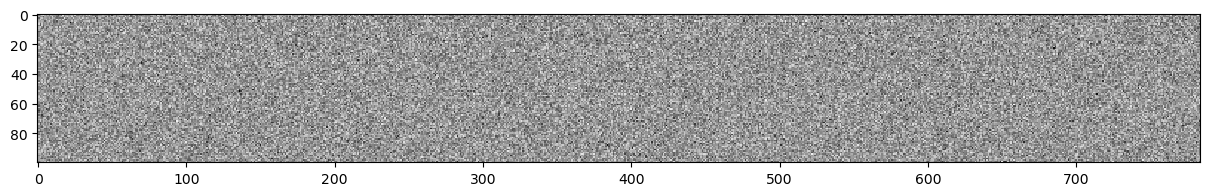

In [8]:
plt.figure(figsize=(15,15))
wihImg = testNet.wih
plt.imshow(wihImg, cmap='Greys', interpolation='None')
plt.show()

Nothing but noise ...

Finally, we create a noisy test image and feed it into the network to check that the dot products are carried out the way we want it:

In [9]:
testImg = np.random.normal(0.0, 0.5, (28,28))

print(testNet.query(testImg))

[0.77793792 0.94354459 0.01427905 0.99890215 0.24018379 0.21138797
 0.01116137 0.59627588 0.9640226  0.99871919]


Next week, this output will tell us what the network has detected as input. The first element will represent the probability that the input was a 0, the second element represents the probability that the input was a 1, and so on.